## The Social and Environmental effect of COVID-19
##### Prepared by: Human Resources
Hamza Muhammedalian

Ragib Guliyev

This project aims to analize and study the effects of the covid-19 pandemic on various aspects including CO2 emmitions, export, imports, unempoloyment, inflation rates etc.


#### The data has been obtained from the following open sourse dataset portals
https://ourworldindata.org/

https://data.oecd.org/

https://data.worldbank.org/

https://stats.wto.org/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv("covid-19.csv")
co2 = pd.read_csv("co2.csv")
inflation = pd.read_csv("Inflation.csv")
suicide = pd.read_csv("suicide.csv")
trade = pd.read_csv("trade.csv")
unemployment = pd.read_csv("unemployment.csv")

In [3]:
df = pd.DataFrame(df.groupby(["location",df["date"].str.split('/').map(lambda x: f"{x[0]}/{x[2]}")]).apply(lambda x: x.sum(axis=0)))

In [4]:
df.drop(["location", "date"], axis=1, inplace=True)
df.reset_index(inplace=True)
df.replace(to_replace=0, value=np.nan, inplace=True)

In [5]:
df.fillna(df.mean(), inplace=True)

/var/folders/q8/p7s2nwrn5wv67j6b66b1z9dm0000gn/T/ipykernel_34951/820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [6]:
df.sample(5)

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,aged_65_older,gdp_per_capita,cardiovasc_death_rate,population
396,Asia,3/2020,3595488.0,96833.000000,1.407480e+05,4254.00000,761.533,20.507000,29.811000,0.902000,258.338236,5.733429e+05,7684.160669,1.463629e+11
7667,United Arab Emirates,1/2020,12.0,4.000000,2.043248e+06,4254.82933,1.272,0.424000,20981.030374,46.898953,3.432000,2.018804e+05,953.520000,2.832341e+07
2576,France,11/2021,221854590.0,508751.000000,3.550631e+06,1476.00000,3271564.302,7502.263000,52359.150000,21.766000,591.540000,1.158170e+06,2581.800000,2.034390e+09
6840,South America,2/2020,19.0,4.000000,2.043248e+06,4254.82933,0.045,0.009000,20981.030374,46.898953,258.338236,5.733429e+05,7684.160669,3.494533e+09
693,Belarus,9/2022,29821110.0,361800.842214,2.135400e+05,4254.82933,3127556.130,5787.218869,22395.480000,46.898953,443.970000,5.150390e+05,13293.870000,2.860487e+08


In [7]:
df['date']= pd.to_datetime(df['date']) 

In [8]:
df.drop(df[df["date"] > "2022-10-01"].index, inplace=True)
df.drop(df[df["date"] < "2020-04-01"].index, inplace=True)

#### In the cells above, the datasets were read and clean to be used in our analysis

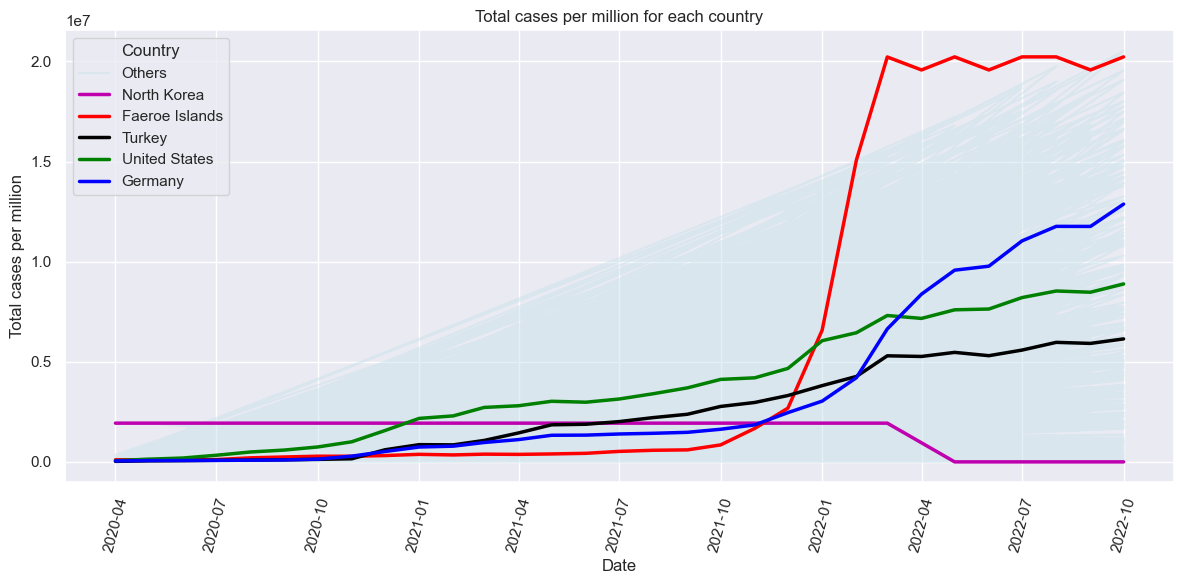

In [9]:
df["date"] = pd.to_datetime(df["date"])

temp = df[df["date"] == '2022-09-01'].groupby("location")["total_cases_per_million"]
mx = temp.max().idxmax()
mn = temp.min().idxmin()

fig, ax = plt.subplots(figsize=(12,6))

# Plotting only selected countries
selected_countries = [mn, mx, "Turkey", "United States", "Germany"]
other_countries = df[~df["location"].isin(selected_countries)]

# Plotting other countries
ax.plot(other_countries["date"], other_countries["total_cases_per_million"], label='Others', color="#C9E3EB", alpha=0.5)

colors = {"Turkey": "black", "United States": "green", "Germany": "blue", mn: "#BE00AF", mx: "red"}

for country in selected_countries:
    country_data = df[df["location"] == country].sort_values("date")
    ax.plot(country_data["date"], country_data["total_cases_per_million"],
            label=country, color=colors[country], linewidth=2.5)

plt.xticks(rotation=75)
plt.title("Total cases per million for each country")
plt.xlabel("Date")
plt.ylabel("Total cases per million")
ax.legend(title='Country', loc='upper left')
plt.tight_layout()
plt.show()


**This graph shows us the progress of the total cases per million of population in each country, we visualized the maximum, minimum values and also visualize 3 of the different countries to show the dynamics of the progress of the cases among the world countries.**

In [10]:
fig = px.choropleth(df[df["date"] == "09-01-2022"], locations='location', color='total_cases_per_million',
                      scope="world", locationmode='country names',
                      labels={'total_cases_per_million':'total cases per million'},
                      hover_data=["population", "gdp_per_capita", "total_deaths_per_million"],
                      title="Total covid-19 cases per million by September 2022", width=1240, height=600,
                    )
fig.show()

**This map shows us the distribution of the total COVID-19 cases per million by September 2022 worldwide. We can also observe the number of population, GDP per capita, total cases per million, and total deaths per million by tapping on each of the given countries. We can observe how the COVID-19 was distributed over a world on a given date range.**

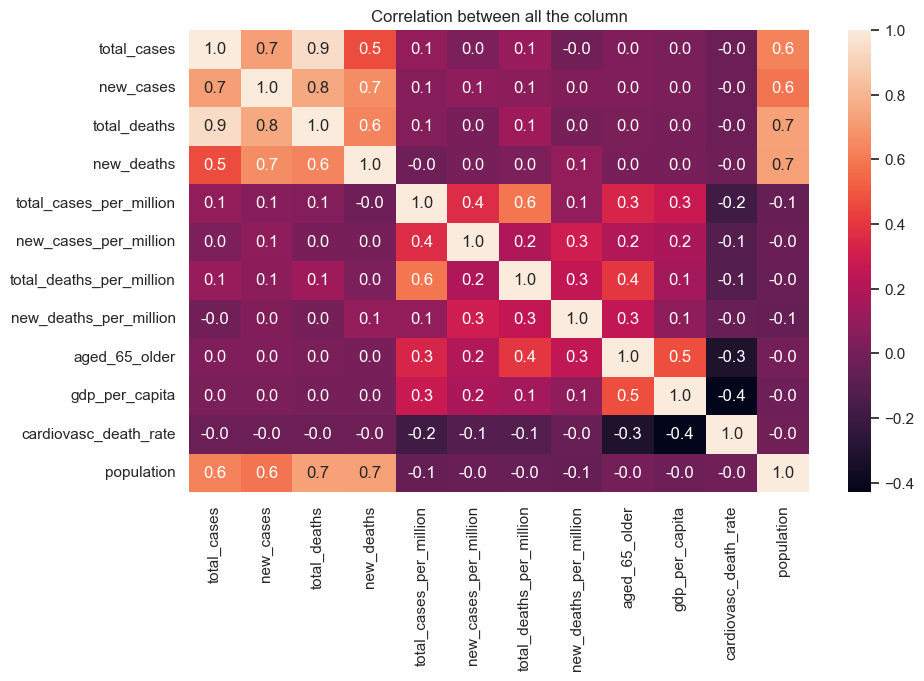

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.title("Correlation between all the column")
plt.show()

**This heatmap, showing the correlation values between the covid-19 dataset, it can be seen that trivially the total number of death related to Covid-19 is highly correlated with the number of new cases of Covid-19, and number of new cases is highly correlated with the population of the country too.**

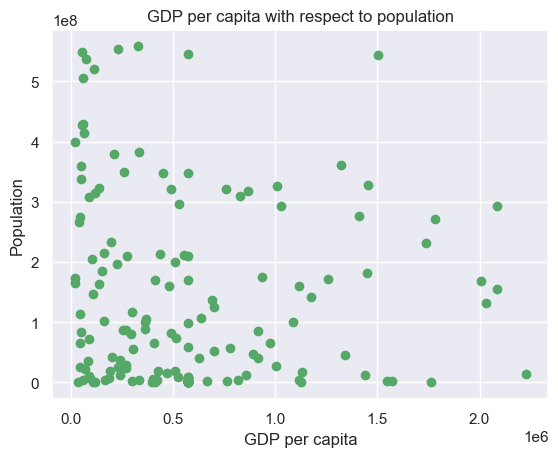

In [12]:
grouped = df.groupby("location")
temp = pd.DataFrame({
        "population": [grouped.get_group(i)["population"].iloc[0] for i in df["location"].unique()],
        "gdp": [grouped.get_group(i)["gdp_per_capita"].iloc[0] for i in df["location"].unique()]
})
plt.scatter(temp["gdp"][(temp["population"]< 6e8) & (temp["gdp"] <2.5e6)], temp["population"][(temp["population"]< 6e8) & (temp["gdp"] <2.5e6)], color="g")
plt.title("GDP per capita with respect to population")
plt.xlabel("GDP per capita")
plt.ylabel("Population")
plt.show()

**This scatter plot shows the distribution of GDP per capita with respect to the population. As the population grows, GDP per capita tends to increase at a slower rate.**

In [13]:
inf_tr = inflation[inflation["Country Name"] == "Turkiye"]
un_tr = unemployment[unemployment["LOCATION"] == "Turkey"]

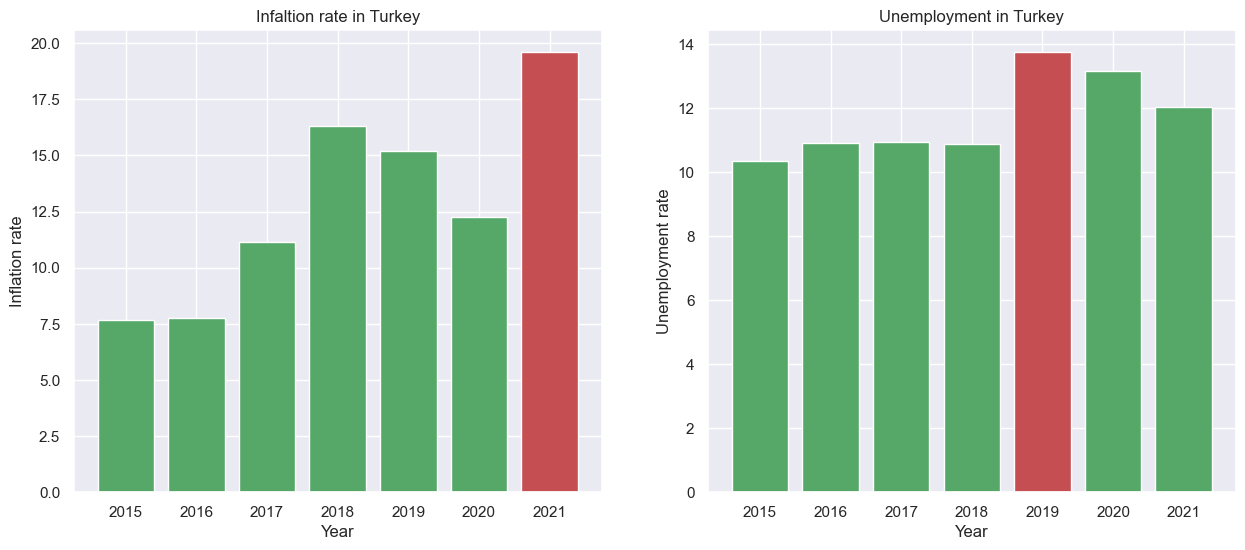

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
c = lambda x: 'r' if x == max(inf_tr["Value"]) else 'g'
plt.bar(inf_tr["Year"], inf_tr["Value"],
        color = list(map(c, inf_tr["Value"]))
        )
plt.xlabel("Year")
plt.ylabel("Inflation rate")
plt.title("Infaltion rate in Turkey")

plt.subplot(1,2,2)
c = lambda x: 'r' if x == max(un_tr["Value"]) else 'g'
plt.bar(un_tr["TIME"], un_tr["Value"],
        color = list(map(c, un_tr["Value"]))
        )
plt.xlabel("Year")
plt.ylabel("Unemployment rate")
plt.title("Unemployment in Turkey")

plt.show()

**These bar plots shows the yearly inflation rate and unemployment rates in Turkey between 2015 and 2021. It can be seen that during the pandamic the inflation rate got higher and reached a maximum, while unployment peeked at 2019 then started to fall down afterwards.**

In [15]:
from sklearn.linear_model import LinearRegression
model_inf = LinearRegression()
model_inf.fit(np.arange(2015, 2021).reshape(-1, 1), inf_tr["Value"][:-1]) 
predicted_inf = model_inf.predict([[2021]])

In [16]:
model_un = LinearRegression()
model_un.fit(np.array(un_tr["TIME"][:-1]).reshape(-1, 1), un_tr["Value"][:-1])
predicted_un = model_un.predict([[2021]])

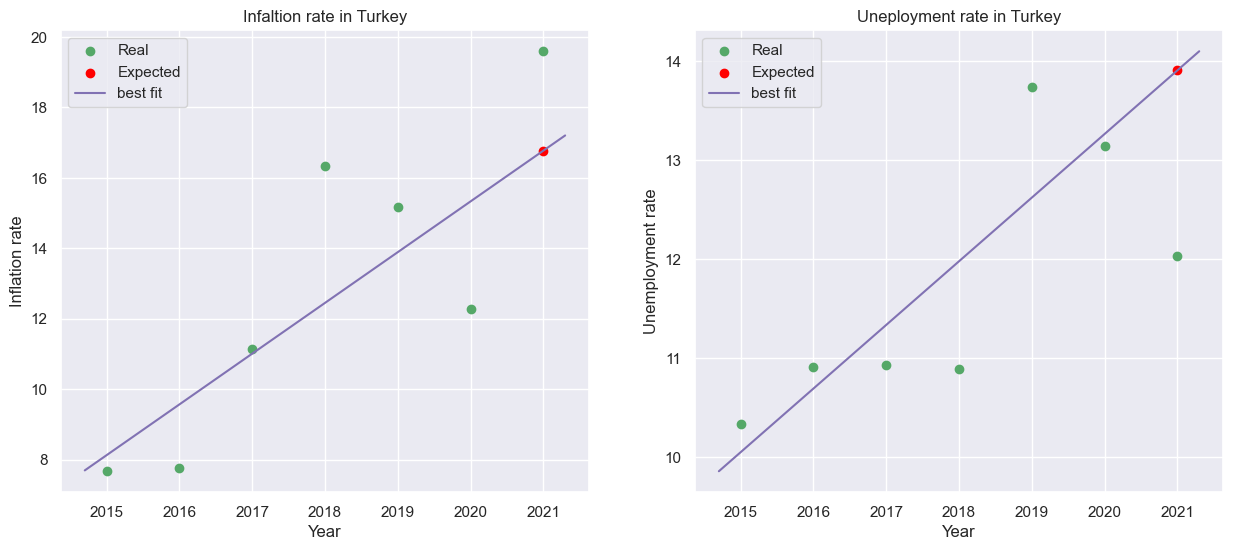

In [17]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.scatter(inf_tr["Year"], inf_tr["Value"],
            color = 'g', label="Real")

plt.scatter(2021, predicted_inf, color='red', label="Expected")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
y = model_inf.coef_ * x + model_inf.intercept_
plt.plot(x, y, label="best fit", color='m')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Inflation rate")
plt.title("Infaltion rate in Turkey")

plt.subplot(1,2,2)
plt.scatter(un_tr["TIME"], un_tr["Value"], color='g', label="Real")
plt.scatter(2021, predicted_un, color='red', label="Expected")

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
y = model_un.coef_ * x + model_un.intercept_
plt.plot(x, y, label="best fit", color='m')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Unemployment rate")
plt.title("Uneployment rate in Turkey")

plt.show()

**These plots show the real and expected, calculated using linear regression, values for inflation rate and unemployment rate. It can be seen that if the inflation rate had countinued increasing at the same rate it would have been lower than its value after the pandamic which suggests a correlation between inflation rate and Covid-19 but not necessarily causation.**

**On the other hand, the expected unemployment is higher than it's true value.**

In [18]:
temp = trade[trade["Country"] == "Turkey"]
fig = go.Figure(data=[
    go.Bar(name="Exports", x=temp["Time"], y=temp["Exports"]),
    go.Bar(name="Imports", x=temp["Time"], y=temp["Imports"])
])

fig.update_layout(barmode='group', title_text="Exports and Imports for Turkey")
fig.show()

**This bargraph shows us the amount of exports and imports for Turkey for each year begining of the 2015 untill 2021. From this graph it can be observed that both Export and Imports are slightly fluctuated between these years, but both have increased in their amounts eventually.**

In [19]:
per_year = [0] * 5
per_year.append(df[df["date"] == "12-01-2020"]["total_cases_per_million"].mean())
per_year.append(df[df["date"] == "12-01-2021"]["total_cases_per_million"].mean())
co2_means = co2.groupby("Time").mean()["Annual CO2 emissions (per capita)"].to_numpy()

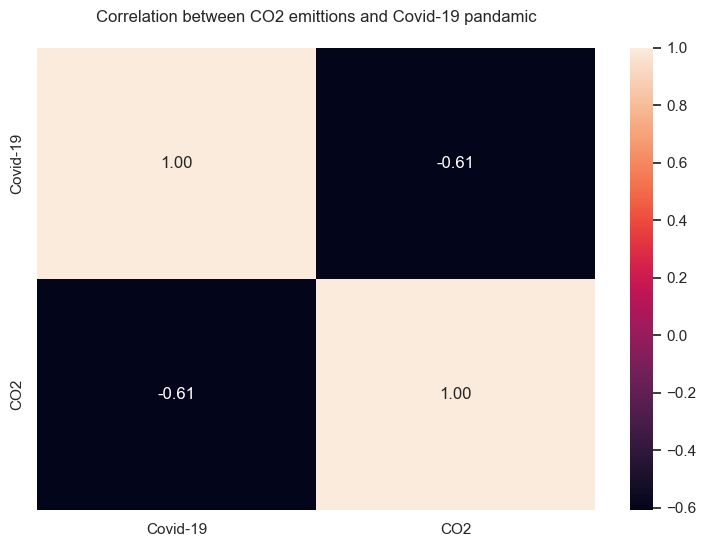

In [20]:
plt.figure(figsize=(9,6))
sns.heatmap(np.corrcoef(per_year, co2_means), annot=True, fmt='.2f')
plt.xticks([.5,1.5], labels=['Covid-19', "CO2"])
plt.yticks([.5,1.5], labels=['Covid-19', "CO2"])
plt.title("Correlation between CO2 emittions and Covid-19 pandamic\n")
plt.show()

**This heatmap is a visualization of the confusion matrix that shows us the Correlation between CO2 emissions and total cases per million per year. As it can be observed from the heatmap, we can state that the correlation between these two factors is -0.6. It means that since the COVID-19 period commenced CO2 emissions decreased.**

#### Hypothesis: Monthly number of new covid-19 cases was larger before mid-2021 (June 2021).

In [21]:
before_mid = df[df["date"] < "07-01-2021"]["new_cases"]
after_mid = df[df["date"] >= "07-01-2021"]["new_cases"]

In [22]:
print(f'Average monthly number of new covid-19 case berfore June 2021: {before_mid.mean()}')
print(f'Average monthly number of new covid-19 case after June 2021: {after_mid.mean()}')

Average monthly number of new covid-19 case berfore June 2021: 238804.76861956547
Average monthly number of new covid-19 case after June 2021: 514711.016529275


In [23]:
from scipy.stats import ttest_ind
_, p_val = ttest_ind(before_mid, after_mid)
print(f"The P-value is: {p_val}")

The P-value is: 9.403247004429627e-07


Since the average number of covid-19 new cases before June 2021 is larger than that after it and the P value is less than 0.05 the null hypothesis is ***rejected***.

### Possible Product
This analysis can be used to study the effects of the pandamic on various aspects of people's livelihood, which can be useful for preventing, maybe even seize it as an opportunity, such negative effects in case of a similar event or pandamic in the future.

### Data Eng. Issues

There are several data engineering issues that may need to be addressed when building a product or service, including:

**Data storage:** How will the data be stored and accessed? This includes considerations such as the type of database to use, the structure of the data, and the performance and scalability requirements.

**Data ingestion:** How will the data be collected and imported into the system? This may involve data sources such as APIs, web scraping, or batch imports, and requires planning for issues such as data formatting and cleaning, error handling, and scheduling.

**Data transformation:** How will the data be cleaned, transformed, and integrated with other data sources? This may involve tasks such as data cleansing, normalization, aggregation, and integration with other systems.

**Data processing:** How will the data be processed and analyzed in order to extract value from it? This may involve tasks such as machine learning, data modeling, and data visualization.

**Data security:** How will the data be protected and kept secure? This includes considerations such as data encryption, access control, and disaster recovery.

**Data governance:** How will the data be managed and governed to ensure compliance with relevant regulations and standards? This may involve tasks such as data classification, data retention, and data privacy.

### Ethical Issues


In this project, we do not have any ethical issues as we are only using open-source data, which is freely available to be collected. However, if we were to gather data through web scraping, we would need to ensure that we have permission from the website to do so. If we do not have permission, it could be considered unethical, even if it is not necessarily illegal. It is important to consider the ethical implications of data collection and ensure that we are acting responsibly and respecting the rights of others.